In [56]:
import pandas as pd
import numpy as np
import edhec_risk_kit as erk
from scipy.optimize import minimize

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
ind = erk.get_indecies()
er = erk.annualized_return(ind['1996':'2000'])
cov = ind['1996':'2000'].cov()

In [29]:
def msr(risk_free_rate, er,cov):
    
    n = er.shape[0]
    init_guess = np.repeat(1/n,n)
    bounds = ((0,1),) * n
    
    
    weights_sum_to_1 = {
        'type': 'eq',
        'fun': lambda weights:np.sum(weights)-1
    }
    
    def neg_sharpe_ratio(weights,risk_free_rate, er,cov):
        r = erk.portfolio_returns(weights,er)
        vol = erk.portfolio_volitility(weights, cov)
        
        return -(r- risk_free_rate)/vol
    
    
    results = minimize(neg_sharpe_ratio, init_guess,
                      args = (risk_free_rate, er,cov,),method = 'SLSQP',
                       options = {'disp': False},
                       constraints = (weights_sum_to_1),
                       bounds = bounds                 
                      )
    
    return results.x

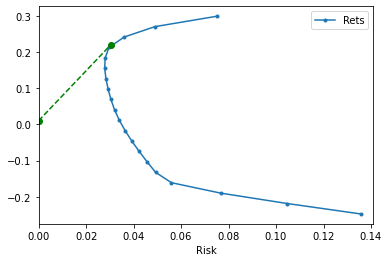

In [52]:
ax = erk.plot_ef(20,er,cov)
ax.set_xlim(left = 0)
rf = .01
w_msr = msr(rf,er,cov)
r_msr = erk.portfolio_returns(w_msr, er)
v_msr = erk.portfolio_volitility(w_msr, cov)

#cml
cml_x = [0,v_msr]
cml_y = [rf,r_msr]

ax.plot(cml_x, cml_y, color = 'green', marker = 'o', linestyle = 'dashed')

<AxesSubplot:xlabel='Risk'>

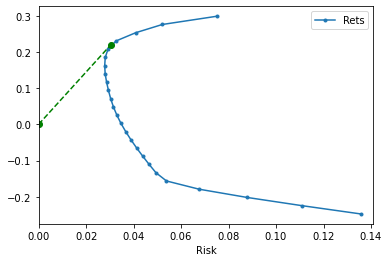

In [62]:
erk.plot_ef(25,er,cov,True,.1)

In [63]:
erk.annualized_return(ind['1996':'2000'])

Agric    0.066551
Food     0.064025
Soda     0.298488
Beer     0.026615
Smoke    0.130061
Toys    -0.069301
Fun     -0.031208
Books    0.072540
Hshld    0.025293
Clths    0.025057
Hlth    -0.034381
MedEq    0.088227
Drugs    0.228699
Chems    0.068160
Rubbr    0.035420
Txtls   -0.128175
BldMt    0.069930
Cnstr    0.058304
Steel   -0.015182
FabPr    0.008263
Mach     0.100842
ElcEq    0.167077
Autos    0.017198
Aero     0.266181
Ships    0.143066
Guns     0.121190
Gold    -0.247120
Mines    0.078887
Coal     0.210707
Oil      0.194653
Util     0.190359
Telcm    0.109441
PerSv   -0.001760
BusSv    0.111793
Hardw    0.138470
Softw    0.031504
Chips    0.229625
LabEq    0.211196
Paper    0.041938
Boxes    0.054226
Trans    0.047572
Whlsl    0.019654
Rtail    0.045305
Meals   -0.034366
Banks    0.142421
Insur    0.105861
RlEst    0.017827
Fin      0.141120
Other    0.086328
dtype: float64